In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings(action='ignore') 

train = pd.read_csv('./train_data.csv')
train = train[train['motor_vibe'] < 7]

test = pd.read_csv('./test_data.csv')
train_out = pd.read_csv('./remove_outlier_type1_train.csv').drop('Unnamed: 0',axis=1)

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train.drop('air_end_temp',axis=1),train['air_end_temp'])
linear.predict(test.drop('air_end_temp',axis=1))

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

array([53.2837366 , 55.23995537, 42.73331308, ..., 40.60199229,
       40.98612811, 42.50830311])

In [2]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(np.array(train['type']).reshape(-1,1))


<2447x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2447 stored elements in Compressed Sparse Row format>

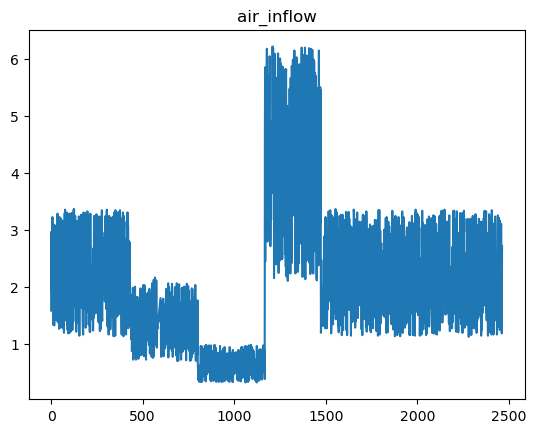

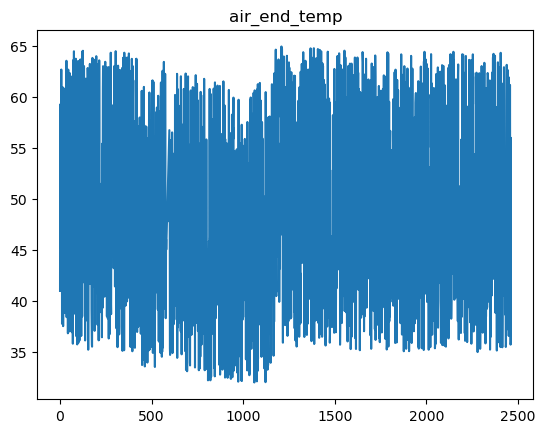

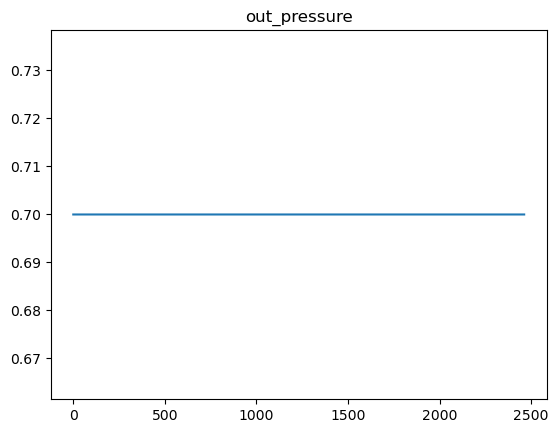

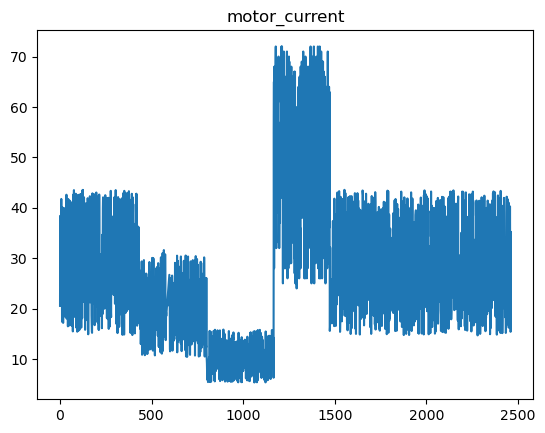

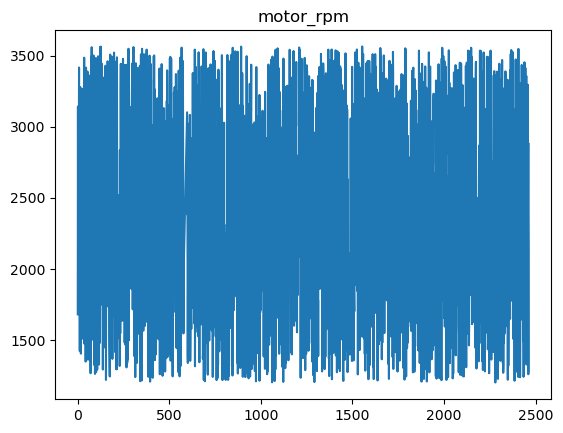

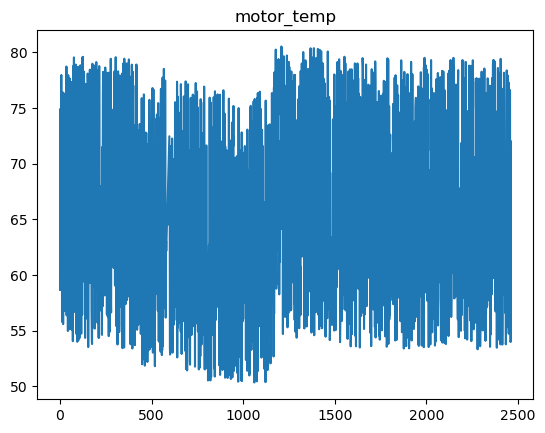

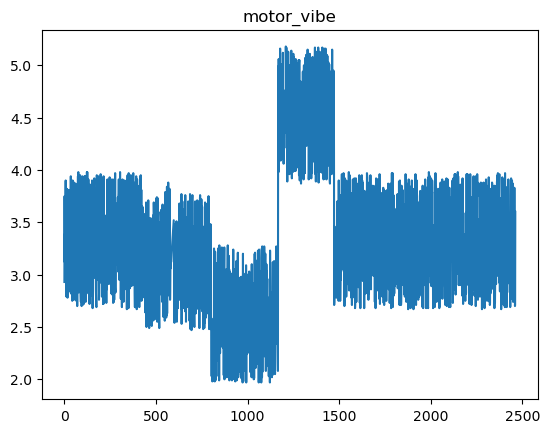

In [3]:
import seaborn as sns
for conf in ['air_inflow','air_end_temp','out_pressure','motor_current','motor_rpm','motor_temp','motor_vibe']:
    plt.title(conf)
    plt.plot(train[conf])
    # plt.plot(test[conf])
    # plt.scatter(test[test['label_tmp'] == 0][conf],test[test['label_tmp'] == 0]['motor_current'])
    plt.show()

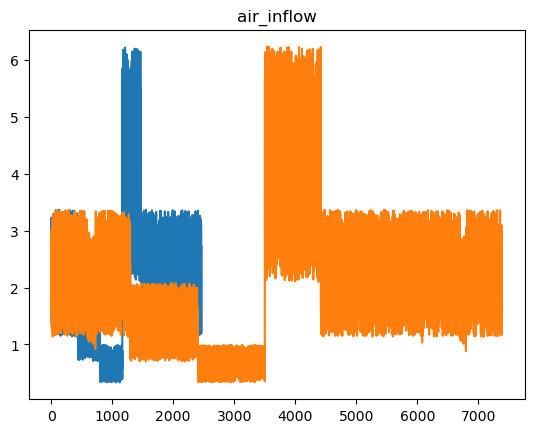

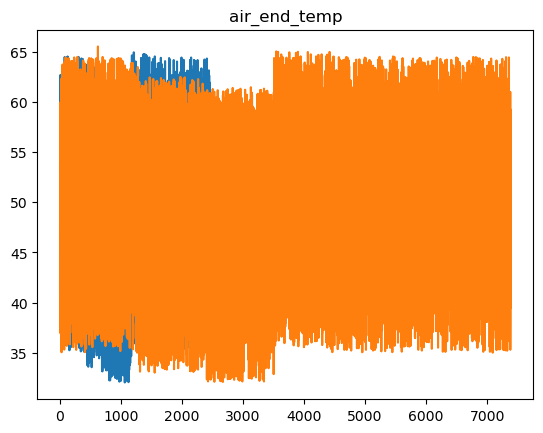

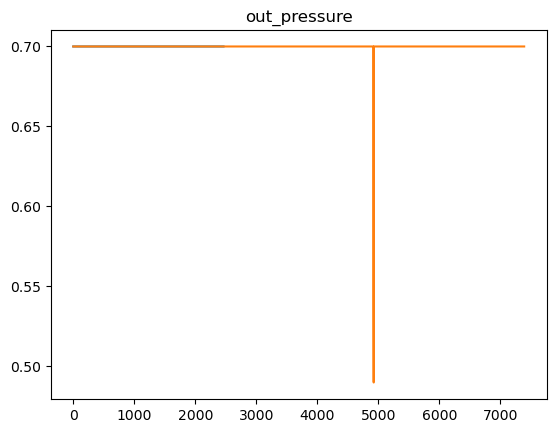

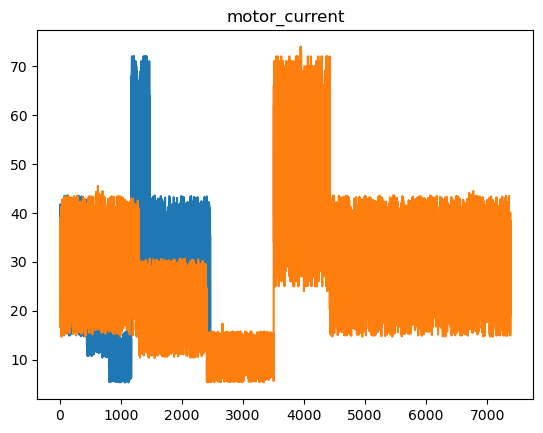

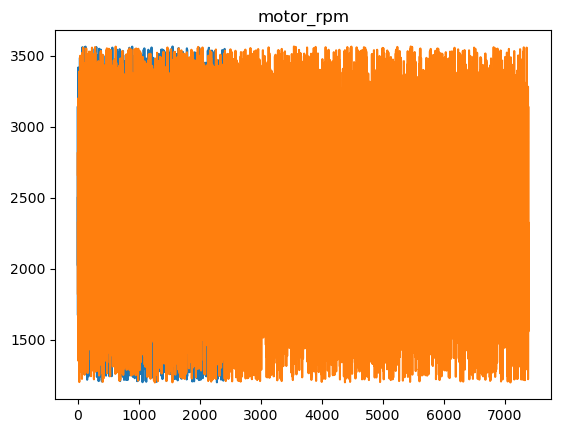

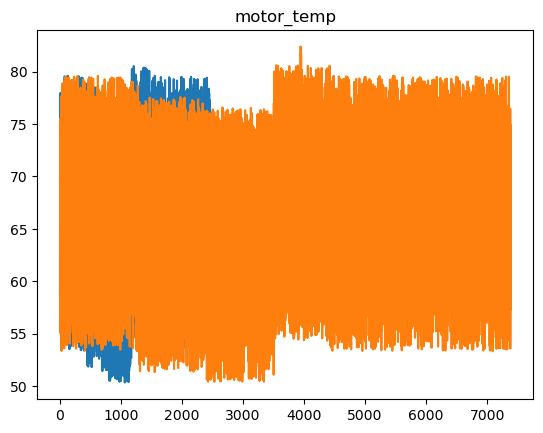

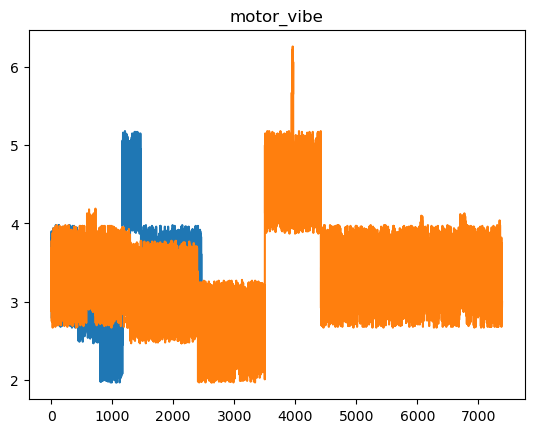

In [4]:
import seaborn as sns
for conf in ['air_inflow','air_end_temp','out_pressure','motor_current','motor_rpm','motor_temp','motor_vibe']:
    plt.title(conf)
    plt.plot(train[conf])
    plt.plot(test[conf])
    # plt.scatter(test[test['label_tmp'] == 0][conf],test[test['label_tmp'] == 0]['motor_current'])
    plt.show()

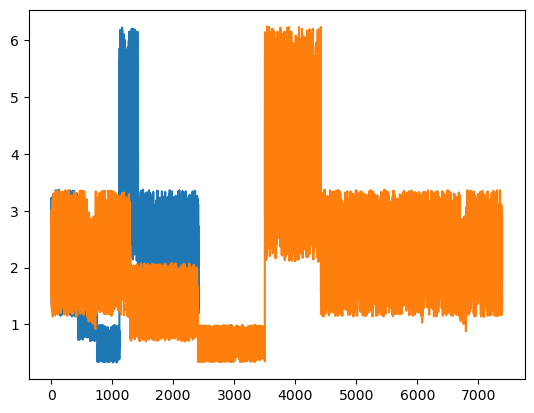

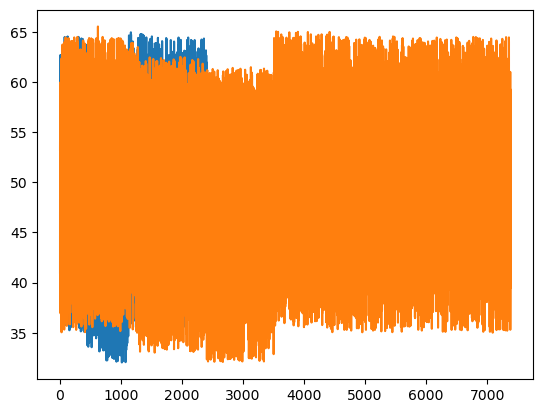

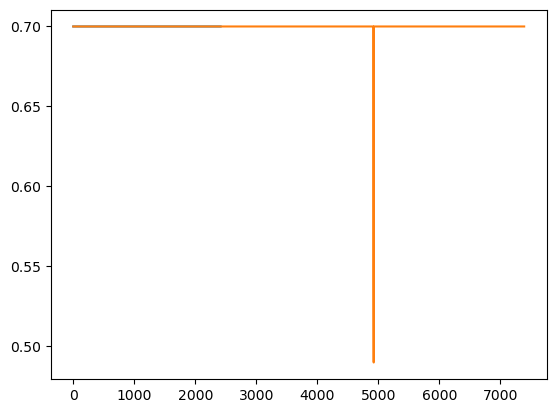

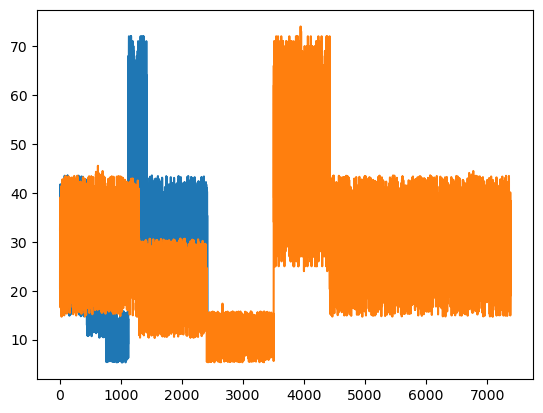

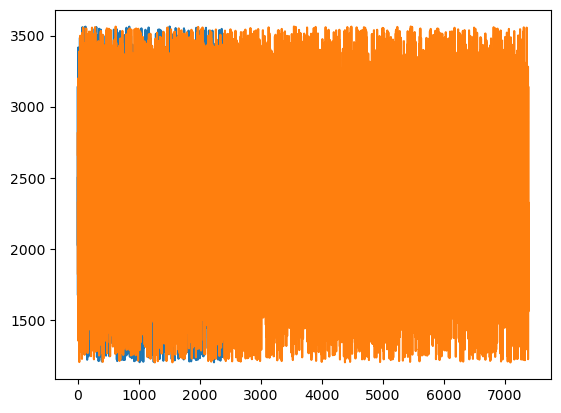

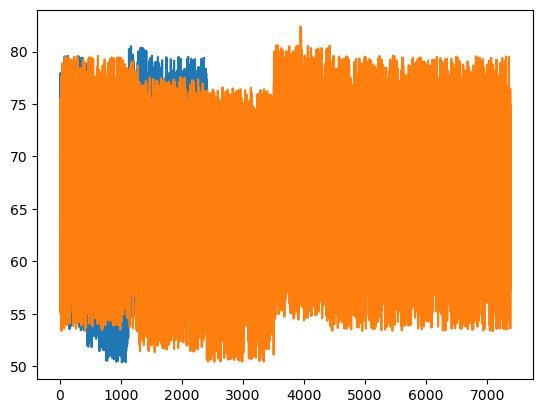

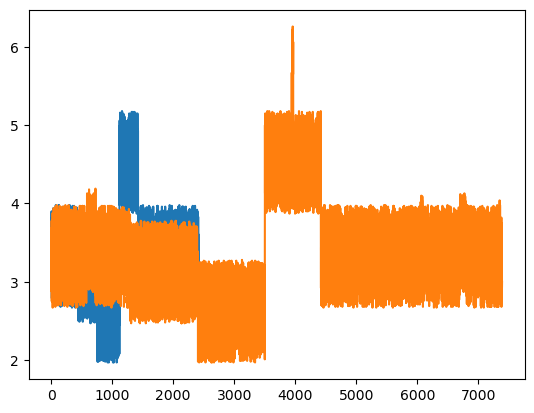

In [5]:
import seaborn as sns
for conf in ['air_inflow','air_end_temp','out_pressure','motor_current','motor_rpm','motor_temp','motor_vibe']:
    plt.plot(train_out[conf])
    plt.plot(test[conf])
    # plt.scatter(test[test['label_tmp'] == 0][conf],test[test['label_tmp'] == 0]['motor_current'])
    plt.show()

In [6]:
# tp = []
# for i in list(test['air_end_temp'] - linear.predict(test.drop('air_end_temp',axis=1))):
#     if abs(i) > 0.285:
#         tp.append(1)
#     else:
#         tp.append(0)

In [7]:
tp = [0 for _ in range(len(test))]
tar = test['air_end_temp'] - linear.predict(test.drop('air_end_temp',axis=1))
for i in range(len(test)):
    if abs(tar[i]) > 0.285:
        tp[i] = 1

In [8]:
sum(tp)

330

In [9]:
for i in test[test.out_pressure != 0.7].index:
    tp[i] = 1

In [10]:
sum(tp)

337

In [11]:
from sklearn.linear_model import LinearRegression
test = pd.read_csv('./test_data.csv')
train = pd.read_csv('./train_data.csv')
train = train[train['motor_vibe'] < 7]

# train_out = pd.read_csv('./remove_outlier_type1_train.csv').drop('Unnamed: 0',axis=1)
lb = 'air_inflow'
linear = LinearRegression()
linear.fit(train.drop(lb,axis=1),train[lb])
linear.predict(test.drop(lb,axis=1))

tp1 = [0 for _ in range(len(test))]
tar = list(test[lb] - linear.predict(test.drop(lb,axis=1)))
for i in range(len(test)):
    if abs(tar[i]) > 0.075:
        tp1[i] = 1
        
for i in test[test.out_pressure != 0.7].index:
    tp1[i] = 1
    
sum(tp1)

395

In [12]:
# test['label_tmp'] = tp
test['label_inf'] = tp1

In [13]:
# test[(test['label_inf'] == 1) | (test['label_tmp'] == 1)]

In [14]:
# import seaborn as sns
# conf = 'air_inflow'
# for conf in ['air_inflow','air_end_temp','out_pressure','motor_current','motor_rpm','motor_temp','motor_vibe']:
#     plt.scatter(test[test['label_tmp'] == 1][conf],test[test['label_tmp'] == 1]['motor_current'])
#     plt.scatter(test[test['label_tmp'] == 0][conf],test[test['label_tmp'] == 0]['motor_current'])
#     plt.show()

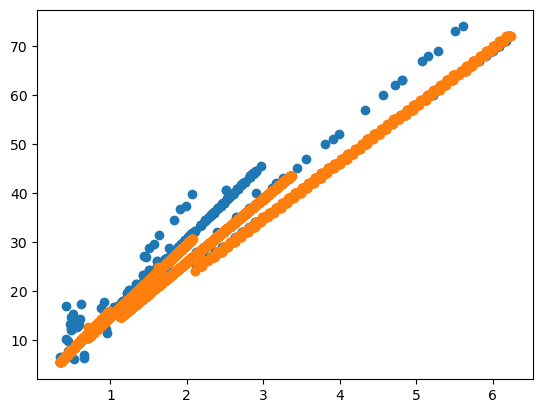

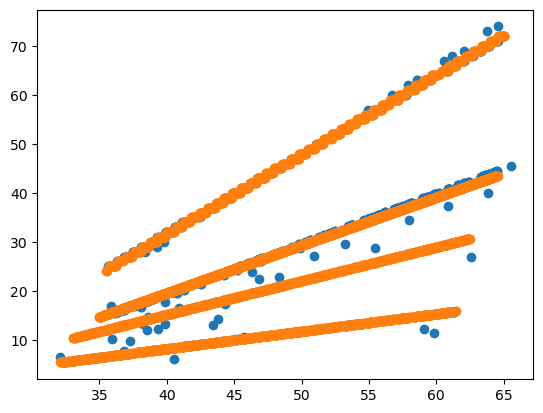

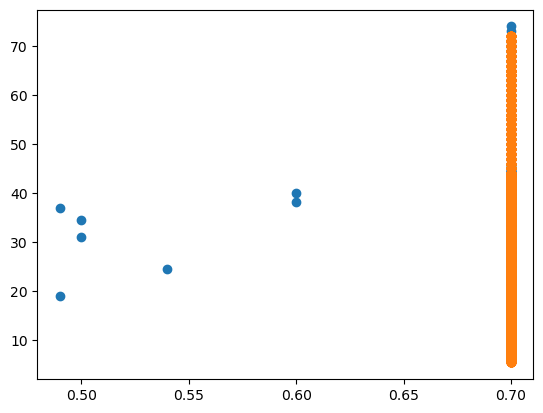

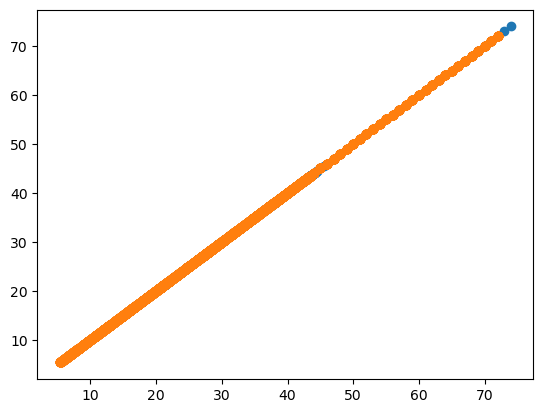

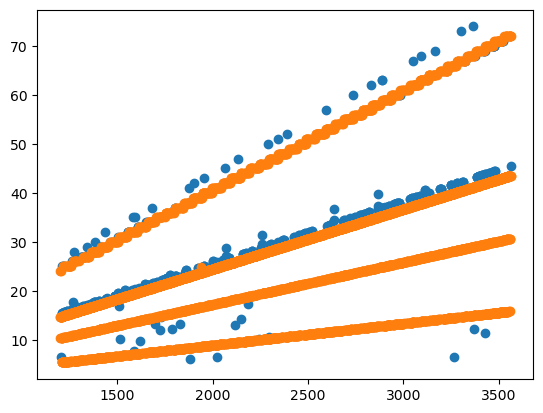

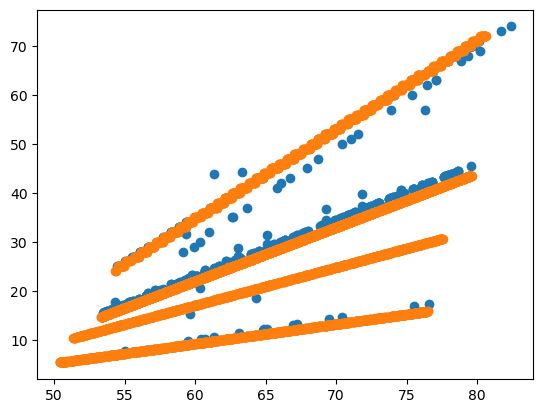

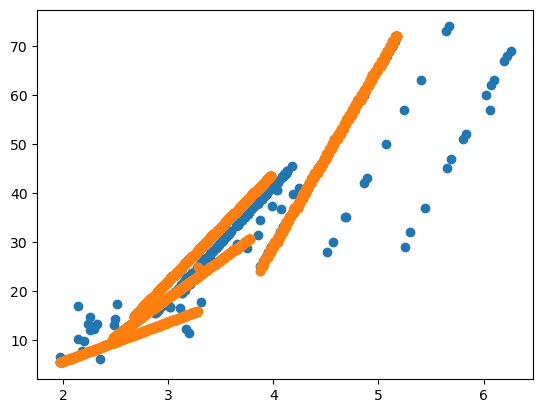

In [15]:
import seaborn as sns
conf = 'air_inflow'
for conf in ['air_inflow','air_end_temp','out_pressure','motor_current','motor_rpm','motor_temp','motor_vibe']:
    plt.scatter(test[test['label_inf'] == 1][conf],test[test['label_inf'] == 1]['motor_current'])
    plt.scatter(test[test['label_inf'] == 0][conf],test[test['label_inf'] == 0]['motor_current'])
    plt.show()

In [16]:
test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label_inf
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,0
...,...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7,0
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7,0
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7,0
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7,0


In [17]:
# tp = [0 for _ in range(7389)]

# for i in test[(test['label_inf'] == 1) | (test['label_tmp'] == 1)].index:
#     tp[i] = 1

In [18]:
sum(tp1)

395

In [19]:
ans_sample = pd.read_csv('./answer_sample.csv')
ans_sample['label'] = tp1
ans_sample.set_index('type',inplace=True)
ans_sample.to_csv('./answer_sample.csv')


In [20]:
test['label_iso'] = pd.read_csv('Isolation_N[7051]_O[338].csv')['label']

In [21]:
test[(test['label_inf'] == 0) & (test['label_iso'] == 1)]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label_inf,label_iso
589,1.62,45.26,0.7,24.80,1941.0,62.34,3.28,0,0,1
2646,0.71,52.53,0.7,12.63,2842.0,68.58,2.88,2,0,1
2829,0.99,61.41,0.7,15.79,3553.0,76.48,3.27,2,0,1


In [22]:
test[(test['label_inf'] == 1) & (test['label_iso'] == 0)]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label_inf,label_iso
3524,2.13,35.71,0.7,25.0,1217.0,54.52,3.88,3,1,0
3557,6.07,63.84,0.7,70.0,3467.0,79.52,5.13,3,1,0
3559,6.16,64.53,0.7,71.0,3522.0,80.13,5.16,3,1,0
3594,5.48,59.63,0.7,63.0,3130.0,75.78,4.94,3,1,0
3618,2.39,37.60,0.7,28.0,1368.0,56.20,3.96,3,1,0
3632,5.22,57.78,0.7,60.0,2982.0,74.13,4.86,3,1,0
3646,6.00,63.33,0.7,69.0,3426.0,79.07,5.10,3,1,0
3648,6.16,64.48,0.7,71.0,3518.0,80.09,5.15,3,1,0
3684,5.91,62.69,0.7,68.0,3375.0,78.50,5.08,3,1,0
3691,2.39,37.60,0.7,28.0,1368.0,56.20,3.96,3,1,0


In [23]:
test[(test['label_inf'] == 1) & (test['label_iso'] == 1)]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label_inf,label_iso
585,1.38,41.64,0.7,21.10,1651.0,58.34,3.12,0,1,1
586,2.06,51.95,0.7,31.64,2476.0,59.34,3.58,0,1,1
587,1.35,41.20,0.7,20.65,1616.0,60.34,3.10,0,1,1
588,2.86,63.93,0.7,43.88,3434.0,61.34,4.11,0,1,1
590,2.89,64.34,0.7,44.30,3467.0,63.34,4.13,0,1,1
...,...,...,...,...,...,...,...,...,...,...
6800,1.44,50.90,0.7,27.05,2072.0,63.02,3.55,6,1,1
7342,1.60,45.04,0.7,24.57,1923.0,61.37,3.27,7,1,1
7348,2.76,62.36,0.7,42.28,3309.0,76.77,4.04,7,1,1
7359,1.48,43.15,0.7,22.64,1772.0,59.69,3.18,7,1,1


In [24]:
for i in test[(test['label_inf'] == 0) & (test['label_iso'] == 1)].index:
    tp1[i] = 0
    
for i in test[(test['label_inf'] == 1) & (test['label_iso'] == 0)].index:
    tp1[i] = 0

In [25]:
sum(tp1)

342

In [26]:
sum(test['label_iso'])

345

In [27]:
ans_sample = pd.read_csv('./answer_sample.csv')
ans_sample['label'] = tp1
ans_sample.set_index('type',inplace=True)
ans_sample.to_csv('./answer_sample.csv')

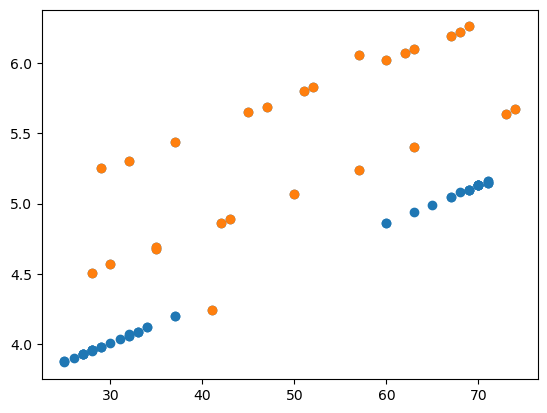

In [28]:
tar = test[(test['type'] == 3) & (test['label_inf'] == 1)]
plt.scatter(tar['motor_current'],tar['motor_vibe'])
tar = test[(test['type'] == 3) & (test['label_iso'] == 1)]
plt.scatter(tar['motor_current'],tar['motor_vibe'])
